In [1]:
ColabNotebook = 'google.colab' in str(get_ipython())

if ColabNotebook:
    # monta G-drive en entorno COLAB
    from google.colab import drive
    drive.mount('/content/drive/')

    # carpeta donde se encuentran archivos .py auxiliares
    FUENTES_DIR = '/content/drive/MyDrive/Colab Notebooks/FUENTES/'
    DATOS_DIR = '/content/drive/MyDrive/Colab Notebooks/DATOS/'      # carpeta donde se encuentran los datasets
else:
    # configuración para notebook con instalación LOCAL
    FUENTES_DIR = '../Fuentes'         # carpeta donde se encuentran archivos .py auxiliares
    DATOS_DIR   = '../Datos/' # carpeta donde se encuentran los datasets

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Ajustar el tamaño predeterminado de las figuras
plt.rcParams['figure.figsize'] = [6,4]

from sklearn import preprocessing, metrics, model_selection

from sklearn.model_selection import cross_val_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD

In [3]:
df = pd.read_csv(DATOS_DIR + 'sonar.csv')

# Tomamos todas las columnas menos la última
X = np.array(df.iloc[:, 0:-1])
Y = np.array(df.iloc[:,-1])

encoder = preprocessing.LabelEncoder()
Y = encoder.fit_transform(Y)

# Convertir las categorías en una lista plana
nombres = list(encoder.inverse_transform([0, 1]))
# Imprimir la lista plana de categorías
print(nombres)


['Mine', 'Rock']


In [4]:
print(encoder.classes_)

['Mine' 'Rock']


In [5]:
#nEj = X.shape[0]

#nomClases = pd.unique(df['class'])
#-- la red tendrá una salida para cada tipo de flor
#salidas = len(nomClases)

#-- la salida debe ser numérica --
#clase = df['class']

#--- CONJUNTOS DE ENTRENAMIENTO Y TESTEO ---
X_train, X_test, Y_train, Y_test = model_selection.train_test_split( \
        X, Y, test_size=0.30) #, random_state=42)

Y_trainB = to_categorical(Y_train)
Y_trainB.shape

(145, 2)

In [6]:
normalizarEntrada = 1  # 1 si normaliza; 0 si no

if normalizarEntrada:
    min_max_scaler = preprocessing.StandardScaler()
    X_train = min_max_scaler.fit_transform(X_train)
    X_test = min_max_scaler.transform(X_test)

### Definición del modelo

In [7]:
nIn = X_train.shape[1]
nOut = Y_trainB.shape[1]
ocultas = 5

model = Sequential()
model.add(Dense(ocultas, input_shape=[nIn], activation='tanh'))
model.add(Dense(nOut, activation='softmax'))

model.summary()  #-- muestra la cantidad de parámetros de la red


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 305       
                                                                 
 dense_1 (Dense)             (None, 2)                 12        
                                                                 
Total params: 317
Trainable params: 317
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Configuración para entrenamiento
#-- se utilizará SGD (descenso de gradiente esticástico),
#-- MSE (error cuadrático medio) y ACCURACY como medida de performance
model.compile(optimizer=SGD(learning_rate=0.001), loss='categorical_crossentropy', metrics='accuracy')


In [9]:
model.fit(X_train,Y_trainB, epochs=500) #, batch_size=20)

Epoch 1/500
5/5 [==============================] - 0s 3ms/step - loss: 0.6957 - accuracy: 0.5724
Epoch 2/500
5/5 [==============================] - 0s 0s/step - loss: 0.6935 - accuracy: 0.5724
Epoch 3/500
5/5 [==============================] - 0s 705us/step - loss: 0.6912 - accuracy: 0.5724
Epoch 4/500
5/5 [==============================] - 0s 3ms/step - loss: 0.6891 - accuracy: 0.5724
Epoch 5/500
5/5 [==============================] - 0s 867us/step - loss: 0.6868 - accuracy: 0.5724
Epoch 6/500
5/5 [==============================] - 0s 4ms/step - loss: 0.6847 - accuracy: 0.5724
Epoch 7/500
5/5 [==============================] - 0s 355us/step - loss: 0.6825 - accuracy: 0.5724
Epoch 8/500
5/5 [==============================] - 0s 911us/step - loss: 0.6802 - accuracy: 0.5724
Epoch 9/500
5/5 [==============================] - 0s 4ms/step - loss: 0.6781 - accuracy: 0.5793
Epoch 10/500
5/5 [==============================] - 0s 0s/step - loss: 0.6759 - accuracy: 0.5862
Epoch 11/500
5/5 [=====

5/5 [==============================] - 0s 0s/step - loss: 0.5531 - accuracy: 0.7241
Epoch 85/500
5/5 [==============================] - 0s 3ms/step - loss: 0.5522 - accuracy: 0.7241
Epoch 86/500
5/5 [==============================] - 0s 0s/step - loss: 0.5511 - accuracy: 0.7241
Epoch 87/500
5/5 [==============================] - 0s 4ms/step - loss: 0.5501 - accuracy: 0.7379
Epoch 88/500
5/5 [==============================] - 0s 2ms/step - loss: 0.5492 - accuracy: 0.7379
Epoch 89/500
5/5 [==============================] - 0s 1ms/step - loss: 0.5482 - accuracy: 0.7448
Epoch 90/500
5/5 [==============================] - 0s 0s/step - loss: 0.5473 - accuracy: 0.7448
Epoch 91/500
5/5 [==============================] - 0s 0s/step - loss: 0.5464 - accuracy: 0.7448
Epoch 92/500
5/5 [==============================] - 0s 2ms/step - loss: 0.5454 - accuracy: 0.7448
Epoch 93/500
5/5 [==============================] - 0s 466us/step - loss: 0.5445 - accuracy: 0.7448
Epoch 94/500
5/5 [=================

5/5 [==============================] - 0s 2ms/step - loss: 0.4950 - accuracy: 0.7931
Epoch 167/500
5/5 [==============================] - 0s 1ms/step - loss: 0.4945 - accuracy: 0.7931
Epoch 168/500
5/5 [==============================] - 0s 0s/step - loss: 0.4940 - accuracy: 0.7931
Epoch 169/500
5/5 [==============================] - 0s 769us/step - loss: 0.4935 - accuracy: 0.7931
Epoch 170/500
5/5 [==============================] - 0s 3ms/step - loss: 0.4929 - accuracy: 0.7931
Epoch 171/500
5/5 [==============================] - 0s 0s/step - loss: 0.4924 - accuracy: 0.7931
Epoch 172/500
5/5 [==============================] - 0s 1ms/step - loss: 0.4919 - accuracy: 0.7931
Epoch 173/500
5/5 [==============================] - 0s 0s/step - loss: 0.4914 - accuracy: 0.7931
Epoch 174/500
5/5 [==============================] - 0s 4ms/step - loss: 0.4909 - accuracy: 0.7931
Epoch 175/500
5/5 [==============================] - 0s 0s/step - loss: 0.4904 - accuracy: 0.7931
Epoch 176/500
5/5 [=======

5/5 [==============================] - 0s 759us/step - loss: 0.4588 - accuracy: 0.8069
Epoch 249/500
5/5 [==============================] - 0s 2ms/step - loss: 0.4584 - accuracy: 0.8069
Epoch 250/500
5/5 [==============================] - 0s 1ms/step - loss: 0.4580 - accuracy: 0.8069
Epoch 251/500
5/5 [==============================] - 0s 2ms/step - loss: 0.4576 - accuracy: 0.8069
Epoch 252/500
5/5 [==============================] - 0s 0s/step - loss: 0.4573 - accuracy: 0.8069
Epoch 253/500
5/5 [==============================] - 0s 988us/step - loss: 0.4569 - accuracy: 0.8069
Epoch 254/500
5/5 [==============================] - 0s 3ms/step - loss: 0.4565 - accuracy: 0.8069
Epoch 255/500
5/5 [==============================] - 0s 1ms/step - loss: 0.4561 - accuracy: 0.8138
Epoch 256/500
5/5 [==============================] - 0s 3ms/step - loss: 0.4558 - accuracy: 0.8138
Epoch 257/500
5/5 [==============================] - 0s 2ms/step - loss: 0.4554 - accuracy: 0.8138
Epoch 258/500
5/5 [==

5/5 [==============================] - 0s 0s/step - loss: 0.4313 - accuracy: 0.8345
Epoch 331/500
5/5 [==============================] - 0s 0s/step - loss: 0.4310 - accuracy: 0.8345
Epoch 332/500
5/5 [==============================] - 0s 2ms/step - loss: 0.4307 - accuracy: 0.8345
Epoch 333/500
5/5 [==============================] - 0s 0s/step - loss: 0.4304 - accuracy: 0.8414
Epoch 334/500
5/5 [==============================] - 0s 4ms/step - loss: 0.4301 - accuracy: 0.8414
Epoch 335/500
5/5 [==============================] - 0s 3ms/step - loss: 0.4298 - accuracy: 0.8414
Epoch 336/500
5/5 [==============================] - 0s 274us/step - loss: 0.4296 - accuracy: 0.8414
Epoch 337/500
5/5 [==============================] - 0s 2ms/step - loss: 0.4292 - accuracy: 0.8414
Epoch 338/500
5/5 [==============================] - 0s 0s/step - loss: 0.4289 - accuracy: 0.8414
Epoch 339/500
5/5 [==============================] - 0s 3ms/step - loss: 0.4286 - accuracy: 0.8414
Epoch 340/500
5/5 [=======

5/5 [==============================] - 0s 528us/step - loss: 0.4090 - accuracy: 0.8621
Epoch 413/500
5/5 [==============================] - 0s 1ms/step - loss: 0.4088 - accuracy: 0.8621
Epoch 414/500
5/5 [==============================] - 0s 1ms/step - loss: 0.4085 - accuracy: 0.8621
Epoch 415/500
5/5 [==============================] - 0s 0s/step - loss: 0.4083 - accuracy: 0.8621
Epoch 416/500
5/5 [==============================] - 0s 1ms/step - loss: 0.4081 - accuracy: 0.8621
Epoch 417/500
5/5 [==============================] - 0s 1ms/step - loss: 0.4078 - accuracy: 0.8621
Epoch 418/500
5/5 [==============================] - 0s 2ms/step - loss: 0.4075 - accuracy: 0.8621
Epoch 419/500
5/5 [==============================] - 0s 2ms/step - loss: 0.4073 - accuracy: 0.8621
Epoch 420/500
5/5 [==============================] - 0s 747us/step - loss: 0.4070 - accuracy: 0.8621
Epoch 421/500
5/5 [==============================] - 0s 2ms/step - loss: 0.4068 - accuracy: 0.8621
Epoch 422/500
5/5 [==

5/5 [==============================] - 0s 1ms/step - loss: 0.3900 - accuracy: 0.8621
Epoch 495/500
5/5 [==============================] - 0s 4ms/step - loss: 0.3898 - accuracy: 0.8621
Epoch 496/500
5/5 [==============================] - 0s 1ms/step - loss: 0.3895 - accuracy: 0.8621
Epoch 497/500
5/5 [==============================] - 0s 0s/step - loss: 0.3893 - accuracy: 0.8621
Epoch 498/500
5/5 [==============================] - 0s 4ms/step - loss: 0.3891 - accuracy: 0.8621
Epoch 499/500
5/5 [==============================] - 0s 4ms/step - loss: 0.3889 - accuracy: 0.8621
Epoch 500/500
5/5 [==============================] - 0s 729us/step - loss: 0.3887 - accuracy: 0.8621


In [10]:
# predecir la salida del modelo
Y_pred = model.predict(X_train)
Y_pred_nro = np.argmax(Y_pred,axis=1)  #-- conversión a entero

print("%% aciertos X_train : %.3f" % metrics.accuracy_score(Y_train, Y_pred_nro))


5/5 [==============================] - 0s 4ms/step
% aciertos X_train : 0.862


### Métricas

In [11]:
report = metrics.classification_report(Y_train, Y_pred_nro, target_names=nombres)
print("Confusion matrix Training:\n%s" % report) 

MM = metrics.confusion_matrix(Y_train, Y_pred_nro)
print("Confusion matrix:\n%s" % MM)

Confusion matrix Training:
              precision    recall  f1-score   support

        Mine       0.89      0.87      0.88        82
        Rock       0.83      0.86      0.84        63

    accuracy                           0.86       145
   macro avg       0.86      0.86      0.86       145
weighted avg       0.86      0.86      0.86       145

Confusion matrix:
[[71 11]
 [ 9 54]]


## AUC-ROC

5/5 [==============================] - 0s 2ms/step


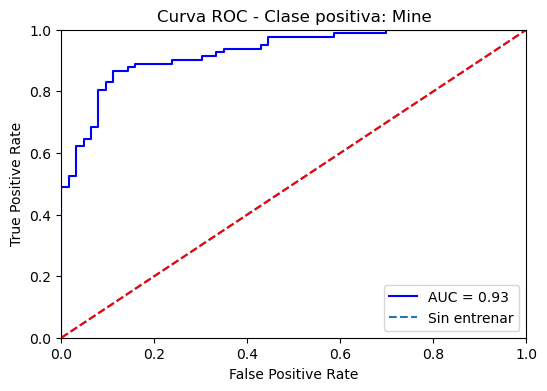

In [12]:
#--- AUC ---
clase_positiva=0  #-- la 1ra. columna corresponde a MINE
Y_pred = model.predict(X_train)
Y_proba = Y_pred[:,clase_positiva]

Y_positivo = Y_trainB[:,clase_positiva]
fpr, tpr, threshold = metrics.roc_curve(Y_positivo, Y_proba)
roc_auc = metrics.auc(fpr, tpr)

#Generamos un clasificador sin entrenar , que asignará 0 a todo
siempre_0 = np.zeros(Y_positivo.shape)
ns_fpr, ns_tpr, _ = metrics.roc_curve(Y_positivo,siempre_0)


# method I: plt
plt.figure()
plt.title('Curva ROC - Clase positiva: '+ nombres[clase_positiva])
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## AUC-PR

5/5 [==============================] - 0s 1ms/step
AUC-PR: 0.9462903652340013


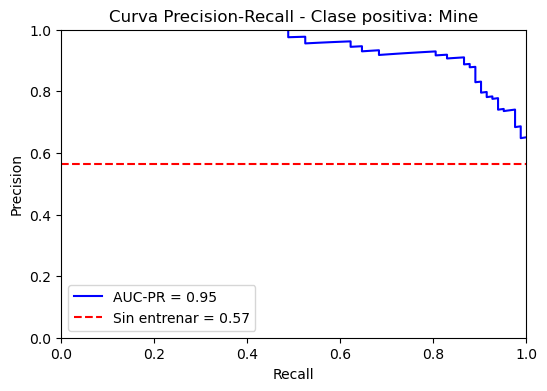

In [13]:
## Curva PR
clase_positiva=0  #-- 0 = 'Mine';  1 = 'Rock'
Y_pred = model.predict(X_train)
Y_proba = Y_pred[:,clase_positiva]

Y_positivo = Y_trainB[:,clase_positiva]

# Calcula la curva de precisión y recall
precision, recall, threshold = metrics.precision_recall_curve(Y_positivo, Y_proba)

# Calcula el área bajo la curva de precisión y recall (AUC-PR)
pr_auc = metrics.auc(recall, precision)

# Imprime el AUC-PR
print("AUC-PR:", pr_auc)

# Tasa de acierto si se responde simpere por la clase positiva
nUnos = np.sum(Y_positivo)/len(Y_positivo)

# Grafica la curva de precisión y recall
plt.figure()
plt.title('Curva Precision-Recall - Clase positiva: '+ nombres[clase_positiva])
plt.plot(recall, precision, 'b', label = 'AUC-PR = %0.2f' % pr_auc)
plt.plot([0,1], [nUnos,nUnos], 'r--', label='Sin entrenar = %0.2f' % nUnos)
plt.legend(loc = 'lower left')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()